<a href="https://colab.research.google.com/github/marquesgabi/Doutorado/blob/master/Fig_05_BIG_Segmentation_ann_new_fig13_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from google.colab import files

In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[13]  #  numbers 4, 13 and 25 (change to the correct one: this is wrong to PSD)
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
# from segment_filter_not_conclude import Segmenta  # got image provided segmented
from segment_filter_not_conclude_parte_03 import Segmenta  

In [9]:
c =100 # size to segment
d = 250  # size to segment

In [10]:
df=Segmenta(img,c,d)
df = df.dropna()

In [11]:
print(df)

    Width           0           1  ...        9997        9998        9999
0     231  169.185623  195.684906  ...  165.836121  166.564667  169.242249
1     174  142.530060  138.677246  ...  154.511826  156.553696  163.226196
2     222   78.760162  118.529503  ...   83.712036   76.507027   68.499557
3     166  113.325745  115.469452  ...    0.000000    0.000000    0.000000
4     227  155.726166  162.639221  ...  144.062546  146.884995  148.424744
5     139  169.217911  185.910614  ...  176.244095  181.405365  181.447296
6     158  148.562241  156.195648  ...  138.095978  141.861725  143.259247
7     109  136.731842  133.765930  ...  202.154617  198.496170  197.979538
8     156  112.232742  112.129532  ...   55.895470   61.901382   66.079559
9     207  129.079407  131.949860  ...    2.480805    2.033817    2.033817
10    153  208.184860  205.240097  ...   25.005682    3.462899    2.094366
11    239  156.148544  162.245911  ...    2.581590    2.581590    2.581590
12    124  251.349640  25

In [12]:

Arq = "output_02.xlsx" # change the name in each new file
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
'''
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img,c,d)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)
'''

"\ncont = 0; num =25\nimg_graos = []\nimg=ww[0] \nwhile( cont < num):\n  df=Segmenta(img,c,d)\n  del df['Width']\n  result = np.array(df)/255\n  prediction = model.predict(result)\n  loc_grao =[];k=0\n  for i in prediction:\n    if( i == 0):\n      img_graos.append(df.iloc[k,:])\n      cont = cont + 1\n    k = k +1\nimg_graos = pd.DataFrame(img_graos)\nprint(img_graos)\n"

In [14]:
 num =25 #
 File_name = 'fotos_01.xlxs' # alterar para salvar os proximos

In [15]:
k = 0; cont = 0;
img_graos = []
img = ww[13] 
while( cont < num):
  df=Segmenta(img,c,d)
  print('k=',k)
  del df['Width']
  img_graos.append(df.iloc[k,:])
  cont = cont + 1
  k = k +1
img_graos = pd.DataFrame(img_graos)
# print(img_graos)
''''''

k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24


''

In [16]:
#np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

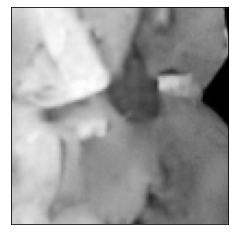

In [17]:
Size = 100
data=np.array(img_graos.iloc[[2],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [18]:
img_graos

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,64.877716,66.537422,73.473137,89.959465,103.148567,106.070221,106.789154,106.283607,110.150917,109.944450,109.785057,110.747757,110.934570,105.678917,108.547211,106.745659,111.798935,109.532707,109.011269,113.332870,116.405624,120.717087,122.430084,116.739632,118.915016,120.209801,126.523361,128.045242,127.443886,128.595261,130.550354,127.818413,130.661972,134.814117,139.997375,138.340286,144.023941,152.741714,160.020782,160.494705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,111.471657,113.331070,104.863945,106.532875,108.970528,107.115654,109.523819,111.297043,111.850349,110.530617,114.571434,119.047630,119.315201,120.285728,120.986397,122.487534,121.371887,122.591843,121.306122,125.859406,121.950119,120.371880,123.727898,122.702950,123.605438,126.571426,127.682541,129.115662,131.108856,133.480728,140.090714,139.863953,141.192749,143.619064,145.448975,149.748291,155.607712,154.265305,155.839005,154.369614,...,133.469391,135.995468,133.408173,128.990921,127.342400,121.102043,119.920639,121.947853,120.605446,117.399094,115.877556,118.680275,120.698418,116.761909,107.142868,104.866211,103.505669,100.653069,107.993202,115.748299,118.104309,123.909302,122.346947,118.714287,121.108849,121.557831,121.984123,119.521553,116.727890,116.047630,117.668945,119.251701,121.056694,120.317467,121.421776,121.358284,122.684807,125.659866,122.691605,121.063492
2,183.624664,182.023941,180.133652,179.710419,181.398819,184.685272,186.116943,189.982544,194.171570,195.577835,196.929062,200.478699,204.573273,206.440491,205.195770,203.847046,203.866699,203.381516,204.922577,206.168915,203.978729,200.947403,197.173782,193.850006,189.297333,184.136108,179.714401,171.786316,165.036316,152.760284,138.752686,131.095016,139.408844,150.096924,152.891663,153.852478,153.183533,154.583466,156.324722,157.908356,...,64.273422,79.920029,91.373970,95.623360,95.885818,94.937981,91.721039,90.448074,92.255432,95.562798,95.037781,97.147224,93.127960,95.859917,89.785576,93.261566,94.822693,96.808502,97.302902,98.343803,97.383240,94.947937,97.777122,98.600121,98.778137,98.261253,100.450485,98.860222,103.170166,104.373322,108.606712,104.262863,104.190186,101.555305,100.484085,96.378952,92.633118,85.686478,85.228516,90.663452
3,145.730957,148.101944,148.061523,151.578522,154.424255,156.181839,159.646484,160.193756,162.881561,163.410477,162.021133,161.670349,163.245178,165.733719,166.898102,169.122131,172.438034,172.120300,173.077148,174.298462,177.981659,180.637283,184.755753,186.215820,192.089996,186.451813,186.226837,182.518829,148.632690,98.520668,103.508728,129.929306,146.011032,150.053268,150.906342,153.077148,154.336105,158.426086,160.364563,162.230499,...,1.761249,2.367310,1.742883,2.000000,2.000000,2.000000,2.370064,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,1.898072,1.787879,1.787879,2.265381,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.797980,3.000000,3.000000,3.000000,3.000000,3.000000,2.632691
4,119.127655,120.288818,120.785416,122.585785,121.033043,121.251244,119.494797,116.515167,116.813492,113.867813,109.295151,115.813492,119.286102,120.405167,122.169296,139.378906,156.224991,154.775909,162.523773,188.517883,214.633301,217.495697,240.152115,250.179260,251.312836,250.995941,250.472168,251.000000,251.231323,250.408783,221.83

In [19]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

879.356688166058

In [20]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
3,145.730957,148.101944,148.061523,151.578522,154.424255,156.181839,159.646484,160.193756,162.881561,163.410477,162.021133,161.670349,163.245178,165.733719,166.898102,169.122131,172.438034,172.1203,173.077148,174.298462,177.981659,180.637283,184.755753,186.21582,192.089996,186.451813,186.226837,182.518829,148.63269,98.520668,103.508728,129.929306,146.011032,150.053268,150.906342,153.077148,154.336105,158.426086,160.364563,162.230499,...,1.761249,2.36731,1.742883,2.0,2.0,2.0,2.370064,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,1.898072,1.787879,1.787879,2.265381,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.393939,2.79798,3.0,3.0,3.0,3.0,3.0,2.632691


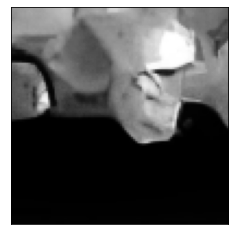

In [21]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

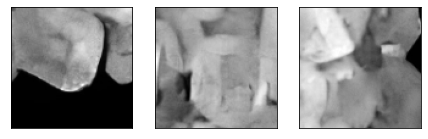

In [22]:
Num = 3
Size=100
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(Size,Size)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [23]:
print(np.random.rand(1,3))

[[0.71848946 0.77288287 0.28289734]]
